In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_csv('BostonHousing.csv')

In [3]:
df.head()

,Crime_rate,zn,indus,chas,nox,rm,Age,Distance,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df.dtypes

Crime_rate    float64
zn            float64
indus         float64
chas            int64
nox           float64
rm            float64
Age           float64
Distance      float64
rad             int64
tax             int64
ptratio       float64
b             float64
lstat         float64
medv          float64
dtype: object

In [5]:
df = df.dropna()

In [6]:
df.isnull().sum()

Crime_rate    0
zn            0
indus         0
chas          0
nox           0
rm            0
Age           0
Distance      0
rad           0
tax           0
ptratio       0
b             0
lstat         0
medv          0
dtype: int64

COLUMNS AND ITS MEANING

    CRIM: Per capita crime rate by town
    ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
    INDUS: Proportion of non-retail business acres per town
    CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    NOX: Nitric oxide concentration (parts per 10 million)
    RM: Average number of rooms per dwelling
    AGE: Proportion of owner-occupied units built prior to 1940
    DIS: Weighted distances to five Boston employment centers
    RAD: Index of accessibility to radial highways
    TRATIO: Pupil-teacher ratio by town
    B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
    LSTAT: Percentage of lower status of the population
    MEDV: Median value of owner-occupied homes in $1000s


<AxesSubplot:>

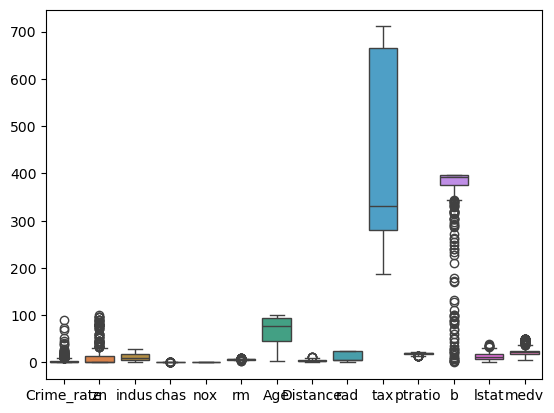

In [7]:
sns.boxplot(data=df)


<AxesSubplot:ylabel='medv'>

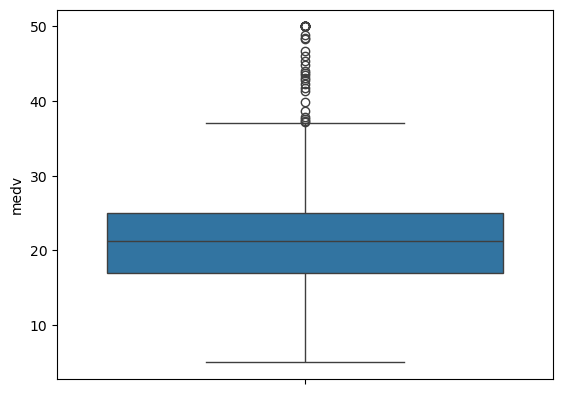

In [8]:
sns.boxplot(data=df.medv) #multiple outliers need to remove it

In [9]:
num_cols = df.select_dtypes(include=np.number).columns  #return the column with numeric datatype

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1

    outliers = df[(df[col]<Q1-1.5*IQR) | (df[col]>Q3+1.5*IQR)]
    print(col, "outliers: ",len(outliers)) #print number of outlier in a column

Crime_rate outliers:  66
zn outliers:  68
indus outliers:  0
chas outliers:  35
nox outliers:  0
rm outliers:  30
Age outliers:  0
Distance outliers:  5
rad outliers:  0
tax outliers:  0
ptratio outliers:  15
b outliers:  76
lstat outliers:  7
medv outliers:  37


In [10]:
#remove the outliers
for col in ["Crime_rate","b","ptratio","rm","lstat"]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    df[col] = df[col].clip(lower, upper) #remove outlies

In [11]:
num_cols = df.select_dtypes(include=np.number).columns

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    outliers = df[(df[col] < Q1 - 1.5*IQR) |
                  (df[col] > Q3 + 1.5*IQR)]

    print(col, "outliers:", len(outliers))

Crime_rate outliers: 0
zn outliers: 68
indus outliers: 0
chas outliers: 35
nox outliers: 0
rm outliers: 0
Age outliers: 0
Distance outliers: 5
rad outliers: 0
tax outliers: 0
ptratio outliers: 0
b outliers: 0
lstat outliers: 0
medv outliers: 37


<AxesSubplot:xlabel='Crime_rate', ylabel='Count'>

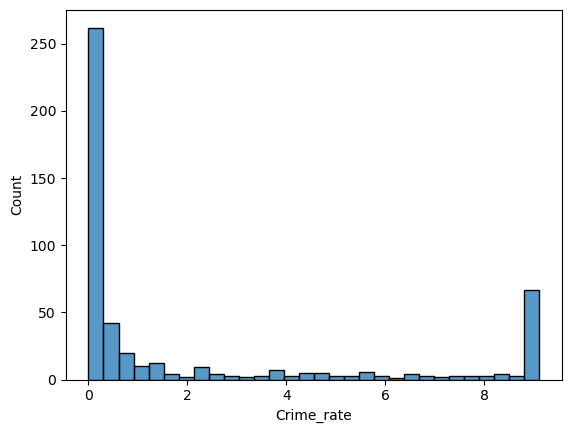

In [12]:
sns.histplot(data=df['Crime_rate'],bins=30)

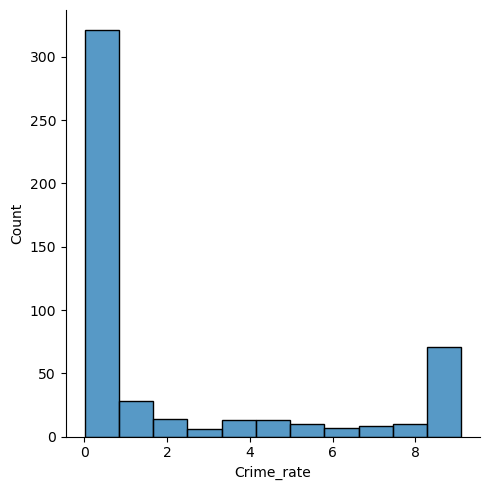

In [13]:
sns.displot(df['Crime_rate'])

<AxesSubplot:xlabel='Crime_rate', ylabel='rm'>

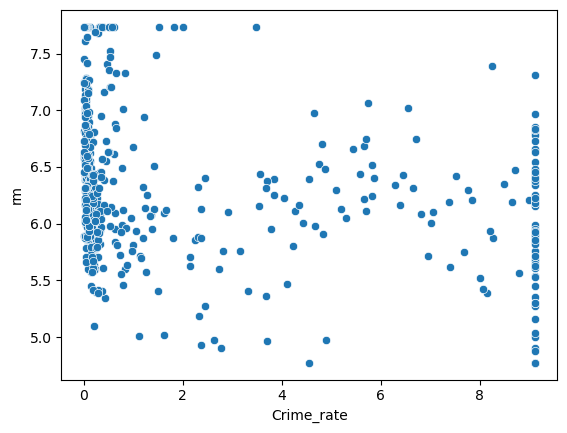

In [14]:
sns.scatterplot(x='Crime_rate',y='rm', data = df)


<AxesSubplot:>

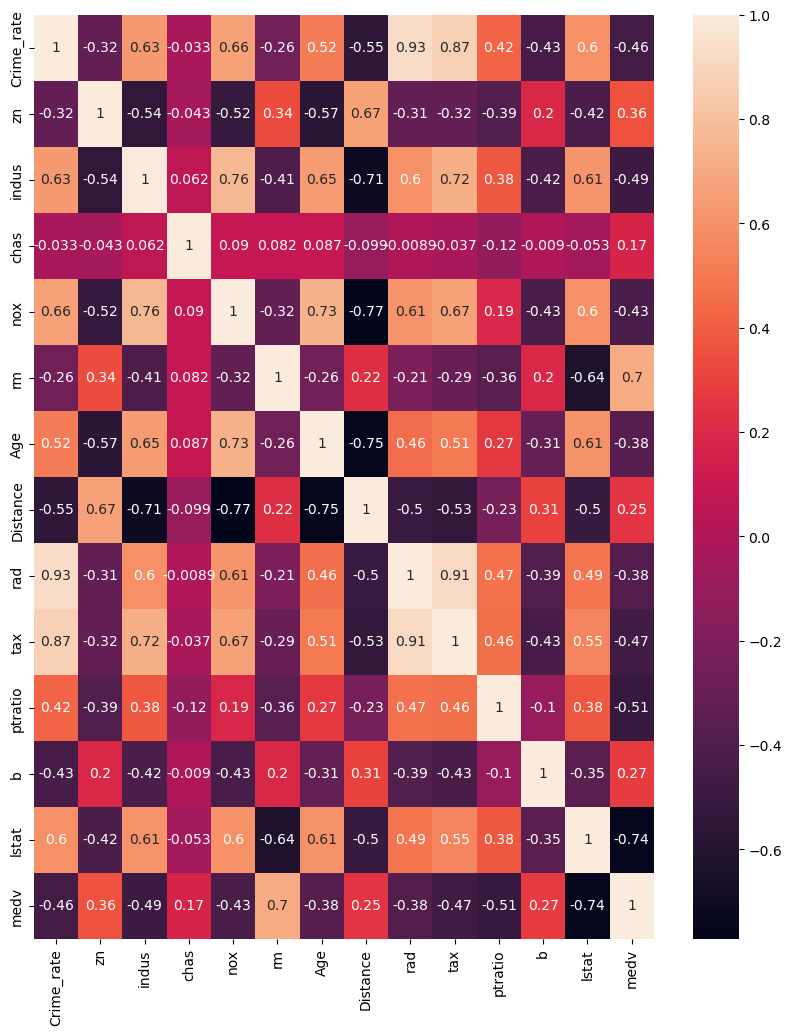

In [15]:
#correlation matrix
plt.figure(figsize=(10,12))
sns.heatmap(data=df.corr(),annot=True)

#crime rate has high correlation with nox=0.66, rad=0.63, tax=0.58,nox=0.42,age=.35
#medv has correlation with zn=0.36,b=0.33, distance=0.25,chas=0.18, rm=0.7

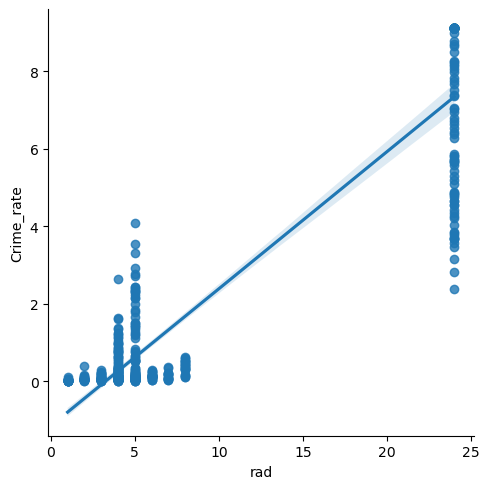

In [16]:
sns.lmplot(x='rad',y='Crime_rate',data=df)

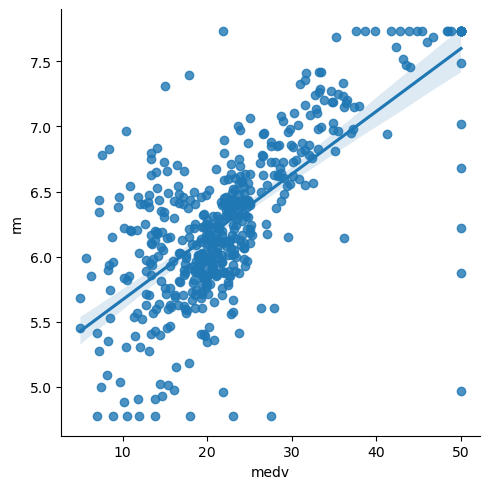

In [17]:
sns.lmplot(x='medv',y='rm',data=df) #is their any linear relation between medv and rm

In [18]:
df = df[df["medv"] < 50] #this trains model only for values till 50 , house above 50 will be considered as 50

TRAINING A LINEAR REGRESSION MODEL
1. Why to train a model?
   to find the best-fitting straight line that describes the relationship between input features and a continuous target variable

In [19]:
#remove skewness as some value too small some very large
for col in ["Crime_rate", "lstat", "tax", "Distance"]:
    df[col] = np.log1p(df[col])

In [20]:
df = df.drop(["rad"], axis=1) #since high correlation between rad and tax .91 but why remove bcoz model don'e understand are price changing due to rad or tax

In [21]:
X = df.drop("medv", axis=1) #drop all columns ezxcept the medv
y = df["medv"]

In [22]:
#split the data in 2 parts the part to be trained and part to be tested
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42) #test_size=0.20 is 80% train and 20% test

In [23]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred = model.predict(X_test)
print('R2 Score: ',r2_score(y_test,y_pred)) #more is good max 1

R2 Score:  0.806046667734579


In [26]:
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred))) #lesser is good

RMSE: 3.3835157178339745


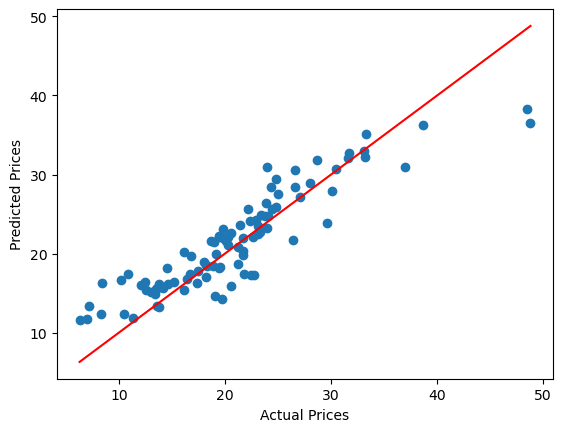

In [29]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()